In [2]:
%matplotlib inline

In [ ]:
# import torch

# # Define the values you want in your tensors
# values = [224., 1266., 1030., 1920.]

# # Create a list of tensors on the 'cuda:0' device
# tensors = [torch.tensor(value, device='cuda:0') for value in values]

# # Convert the list of tensors to a list of integers
# int_values = [int(tensor.item()) for tensor in tensors]

# # Print the list of integers to verify
# print(int_values)


In [5]:
# # Original nested list
# nested_floats = [[381.702096, 1482.3213696, 532.6340112, 1697.596128]]

# # Convert to a nested list of integers
# nested_ints = [[int(value) for value in sublist] for sublist in nested_floats]

# # Print the result to verify
# nested_ints

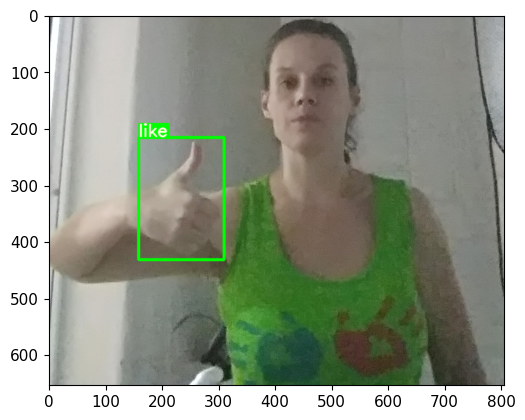

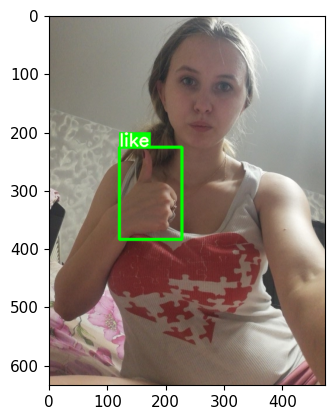

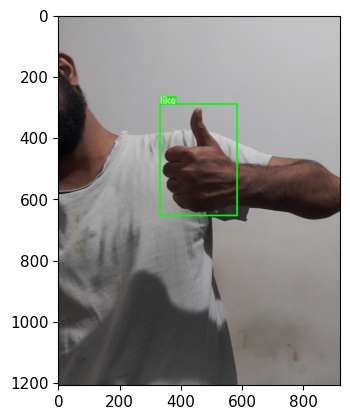

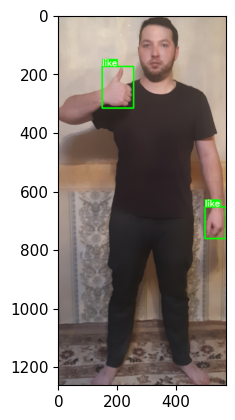

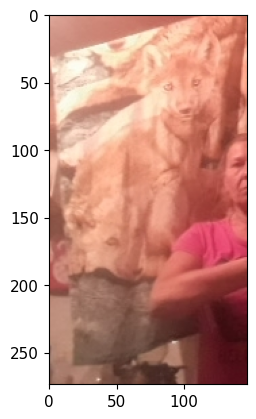

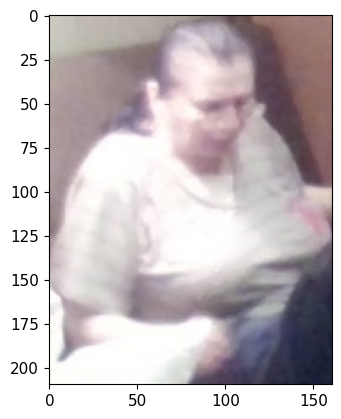

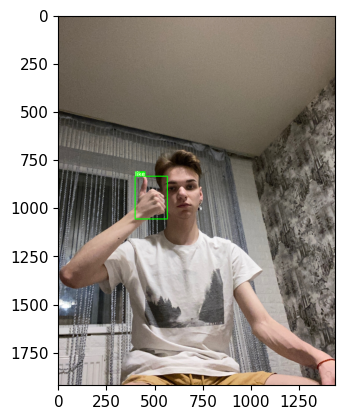

<Figure size 640x480 with 0 Axes>

In [3]:
import cv2
import albumentations as A

# Define the transformation
def crop_n_transform(image_path, human_bbox, hand_bboxes):
    x1, y1, x2, y2 = human_bbox
    
    bbox_params = A.BboxParams(format='pascal_voc', label_fields=[])
    transform = A.Compose([
        A.Crop(x_min=x1, y_min=y1, x_max=x2, y_max=y2, p=1.0),
    ], bbox_params=bbox_params)
    
    # Convert bounding boxes to the required format
    bboxes = [[hx1, hy1, hx2, hy2] for (hx1, hy1, hx2, hy2) in hand_bboxes]
    
    # load image from path
    image = cv2.imread(image_path)
    
    # Apply the transformation
    transformed = transform(image=image, bboxes=bboxes)
    return transformed['image'], transformed['bboxes']


from os.path import join, abspath
import sys
from matplotlib import pyplot as plt

base_path = abspath('./../training/model/yolov7/')
sys.path.append(base_path)
from utils.plots import plot_one_box

path = "./../datasets/HaGRID_test/like/"

human_bbx_0 = [224, 1266, 1030, 1920]
gestures_bbxs_0 = [[382, 1482, 533, 1698]]
image_0 = join(path, "002cc8a1-7a8b-4b2f-bf0f-7f74548c37b4.jpg")

human_bbx_1 = [4, 4, 478, 638]
gestures_bbxs_1 = [[124, 230, 231, 388]]
image_1 = join(path, "00c15276-437f-49ef-84ac-80cab0a01f26.jpg")

human_bbx_2 = [0, 712, 922, 1920]
gestures_bbxs_2 = [[332, 1002, 583, 1366]]
image_2 = join(path, "0082629f-d111-424f-8a65-ae8314a7f5ec.jpg")

human_bbx_3 = [393, 400, 965, 1662]
gestures_bbxs_3 = [[543, 575, 650, 717], [893, 1054, 972, 1162]]
image_3 = join(path, "00277cca-b999-4527-bba3-9461fd2eb45b.jpg")

human_bbx_4 = [168, 205, 315, 479]
gestures_bbxs_4 = [[319, 366, 353, 412]]
image_4 = join(path, "005621d3-5e1f-4833-9abe-a2dfbd8216a6.jpg")

human_bbx_5 = [183, 354, 344, 564]
gestures_bbxs_5 = [[760, 331, 917, 563]]
image_5 = join(path, "00209a6a-a779-4af7-9307-b2a598406f43.jpg")

image_6 = join(path, "00283977-caa9-4259-9629-d60d52352e37.jpg")
loaded_img_6 = cv2.imread(image_6)
human_bbx_6 = [0, 0, loaded_img_6.shape[1], loaded_img_6.shape[0]]
gestures_bbxs_6 = [[399, 836, 566, 1058]]
               

image_data = [
    {"image_path": image_0, "human_bbox": human_bbx_0, "hand_bboxes": gestures_bbxs_0},
    {"image_path": image_1, "human_bbox": human_bbx_1, "hand_bboxes": gestures_bbxs_1},
    {"image_path": image_2, "human_bbox": human_bbx_2, "hand_bboxes": gestures_bbxs_2},
    {"image_path": image_3, "human_bbox": human_bbx_3, "hand_bboxes": gestures_bbxs_3},
    {"image_path": image_4, "human_bbox": human_bbx_4, "hand_bboxes": gestures_bbxs_4},
    {"image_path": image_5, "human_bbox": human_bbx_5, "hand_bboxes": gestures_bbxs_5},
    {"image_path": image_6, "human_bbox": human_bbx_6, "hand_bboxes": gestures_bbxs_6}
]

# Function call loop
for data in image_data:
    img, bbxs = crop_n_transform(data["image_path"], data["human_bbox"], data["hand_bboxes"])
    
    for gesture_bbox in bbxs:
        plot_one_box(gesture_bbox, img, label='like', color=(0, 255, 0), line_thickness=3)
            
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.pause(0.001) 
    plt.clf() 
    
# crop_and_transform()
# xyxy_to_xywh()
# save()